# Características Geométricas del Perfil
------------------------------------------
+ Objetivos: sobre la imagen de bloques encontrar los parámetros de área, perímetro, orientación y sus contornos.

In [ ]:
!pip install opencv-python

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from IPython.display import Image, Latex 

#### Leemos la imagen

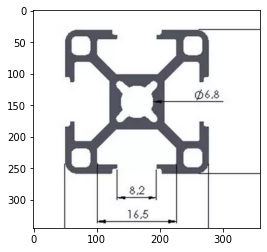

In [3]:
img = cv.imread('plot_perfil.png')
imgRGB =cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure("Imagen original")
plt.imshow(imgRGB)
plt.show()

## Recorte para referencia de medidas
+ Definimos Field of view(fov) para centrarnos en el segmento que posee la referencia

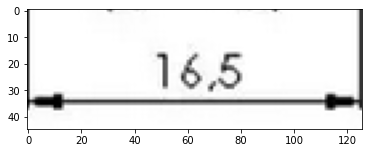

In [67]:
fov_ref = imgRGB[300:380,102:228]
fov_ref_gray=cv.cvtColor(fov_ref, cv.COLOR_RGB2GRAY )

plt.figure("FOV")
plt.imshow(fov_ref_gray,cmap='gray')
plt.show()

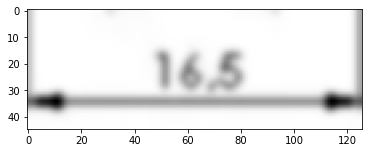

In [68]:
c_ref = cv.GaussianBlur(fov_ref_gray,(15,15),1.5)

plt.figure("Gaussiana")
plt.imshow(c_ref,cmap="gray")
plt.show()

## Detecto bordes con canny

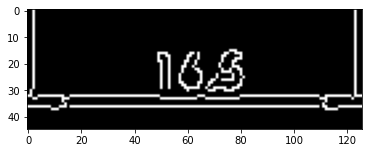

In [69]:
low_threshold = 50
high_threshold = 200
edges = cv.Canny(c_ref, low_threshold, high_threshold)

plt.figure("Canny")
plt.imshow(edges, cmap="gray")
plt.show()

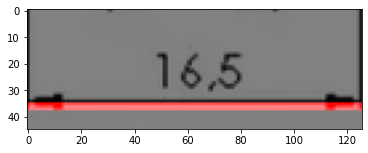

In [70]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 10  # maximum gap in pixels between connectable line segments
line_image = np.copy(fov_ref) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
    
# Draw the lines on the  image
lines_edges = cv.addWeighted(fov_ref, 0.5, line_image, 1, 2)



plt.figure("edges")
plt.imshow(lines_edges)
plt.show()

## Conversión de unidades

+ Llego a la conversión calculando la longitud del segmento marcado en rojo, siendo \textit{Length} la distancia entre los extremos (x1,y1) y (x2,y2) 

$$length=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [71]:
length=np.sqrt(((x1)-(x2))**2+(y1-y2)**2)
print("La longitud en píxeles del segmento es de : ",length)
cm=length/1.65 #cuantos pixeles hay en 1cm
print("En 1cm hay",cm,"Pixeles")

La longitud en píxeles del segmento es de :  125.0
En 1cm hay 75.75757575757576 Pixeles


### Recorte para contornos
+ Definimos el field of view (fov) para centrarnos en el area donde se encuentran los bloques

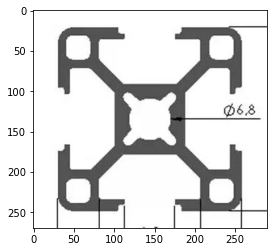

In [58]:
fov = imgRGB[10:280,20:310]
fov_gray=cv.cvtColor(fov, cv.COLOR_RGB2GRAY )

plt.figure("FOV")
plt.imshow(fov_gray,cmap='gray')
plt.show()

## Filtro gaussiano
+ Aplicamos un filtro gaussiano a la imagen equalizada para suavizar y desenfocar la imagen

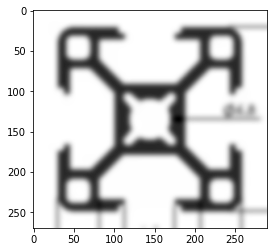

In [100]:
c = cv.GaussianBlur(fov_gray,(17,17),3.2)

plt.figure("Gaussiana")
plt.imshow(c,cmap="gray")
plt.show()

## Binarizacion Umbral Fijo
+ Binarizamos la imagen para luego utilizar la funcion findContours que provee Open CV

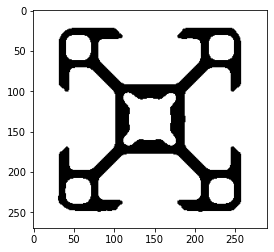

In [101]:
ret, img_bin = cv.threshold(c,150,255,cv.THRESH_BINARY)

plt.figure("Imagen Binarizada")
plt.imshow(img_bin,cmap='gray')
plt.show()

## Contornos
+ Hallamos los contornos de la imagen y mostramos cuantos se han encontrado.

In [102]:
#Para la función findContours dependiendo de la versión de opencv utilizada desempaqueta 2 o 3 datos.
contours, hierarchy = cv.findContours(img_bin, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

print("Cantidad de contornos encontrados: ", len(contours))

Cantidad de contornos encontrados:  7


In [103]:
i=0
bloques = []

for cnt in contours:
    area = cv.contourArea(cnt)
    #para eliminar ruidio tomamos areas mayores a 200
    if area > 200 and area < 50000:
        print('i:{} Área: {}'.format(i, area))
        bloques.append(cnt)    
    
    i+=1

i:1 Área: 22788.0
i:2 Área: 831.0
i:3 Área: 843.0
i:4 Área: 2979.0
i:5 Área: 829.0
i:6 Área: 822.0


+ Dibujamos los contornos y denominamos los bloques sobre una copia de la imagen fov

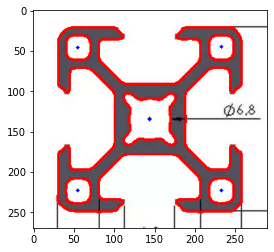

True

In [104]:
img_out1 = fov.copy()
i=1

for cnt in bloques:
    
    cv.drawContours(img_out1, [cnt], 0, (255,0,0), 2)
    #Centros de cada bloque
    M = cv.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    img_out1=cv.circle(img_out1, (cx,cy), radius=0, color=(0, 0, 255), thickness=4)

#img_out1=cv.circle(img_out1, (233,223), radius=0, color=(0, 0, 255), thickness=4)

plt.figure("Imagen 1 contornos")
plt.imshow(img_out1)
plt.show()

img_out1RGB = cv.cvtColor(img_out1, cv.COLOR_BGR2RGB)
cv.imwrite("Imagen-Contornos1.jpg", img_out1RGB)

## Parametros
+ Perimetro
+ Area
+ Orientacion
+ Relación de aspecto (largo Vs. ancho)

In [125]:
#Por regla de 3 calculo 1cm2 en píxeles

cm2= cm*cm #equivalente de cm2 en pixeles
cm4=cm**4
i=1


Jx=[]
Areas=[]
for cnt in bloques:    
    
    # Perimetro
    p = cv.arcLength(cnt,False)
    p= p/cm #cm
    
    # Area
    area = cv.contourArea(cnt)
    area= area/cm2 #cm2
    Areas.append(area)
    
    #Momentos de inercia
    M = cv.moments(cnt)
    Mx= (M["mu20"])/cm4
    Jx.append(Mx)
    My= int(M["mu02"])/cm4
    
    #Centros de cada bloque
    cx = int(M['m10']/M['m00'])/cm
    cy = int(M['m01']/M['m00'])/cm
        
    print('Bloque {} | Perimetro: {} - Área: {} - Jx: {} - Jy: {} - Cx: {} - Cy: {}'.format(i, '%.1f' % p,'%.2f' % area,'%.4f' % Mx,'%.4f' % My,'%.1f' % cx,'%.1f' % cy ))
    
    i+=1

Bloque 1 | Perimetro: 22.6 - Área: 3.97 - Jx: 3.3628 - Jy: 3.3925 - Cx: 1.9 - Cy: 1.8
Bloque 2 | Perimetro: 1.4 - Área: 0.14 - Jx: 0.0017 - Jy: 0.0017 - Cx: 3.1 - Cy: 2.9
Bloque 3 | Perimetro: 1.4 - Área: 0.15 - Jx: 0.0017 - Jy: 0.0017 - Cx: 0.7 - Cy: 2.9
Bloque 4 | Perimetro: 3.7 - Área: 0.52 - Jx: 0.0259 - Jy: 0.0258 - Cx: 1.9 - Cy: 1.8
Bloque 5 | Perimetro: 1.4 - Área: 0.14 - Jx: 0.0017 - Jy: 0.0017 - Cx: 3.1 - Cy: 0.6
Bloque 6 | Perimetro: 1.4 - Área: 0.14 - Jx: 0.0016 - Jy: 0.0017 - Cx: 0.7 - Cy: 0.6


# Verifico desplazamientos

+ Por principio de trabajos virtuales se tiene:
$$\delta = \int_0^{L} M \tilde{M} \frac{dx}{EJ}=\frac{1}{2}F\frac{L^3}{EJ}$$

In [128]:
#tomando un determinado valor de h y relación de aspecto

d=1.2 # Distancia de huecos al baricentro en cm
h=20 #cm altura de perfil
r=1.5 #Relación de aspecto
Atotal=Areas[0]-Areas[2]*4-Areas[3]
F=5*9.8 #N
L=130+2*h #longitud de flexión
J_total=Jx[0]-4*(Jx[2]+Areas[2]*d**2)-Jx[3]
#J_total=2.6 #cm4
E_aluminio=70*10**6 #N/cm2
delta=1/2*F*L**3/(J_total*E_aluminio)
print(J_total)
print(Atotal)
display(Latex(f'El desplazamiento vale $\delta= {delta:.2f} cm$'))


2.483966497417461
2.863982879999999


<IPython.core.display.Latex object>

In [129]:
#Tomando sección transversal 2 perfiles unidos
J_union=2*(J_total+Atotal*1.5)

delta_union=1/2*F*L**3/(J_union*E_aluminio)

display(Latex(f'El desplazamiento vale $\delta= {delta_union:.2f} cm$'))


<IPython.core.display.Latex object>

# Perfil 4040

https://www.disumtec.com/es/perfileria-aluminio/7004-perfil-aluminio-40x40-ligero-l-1000-mm.html

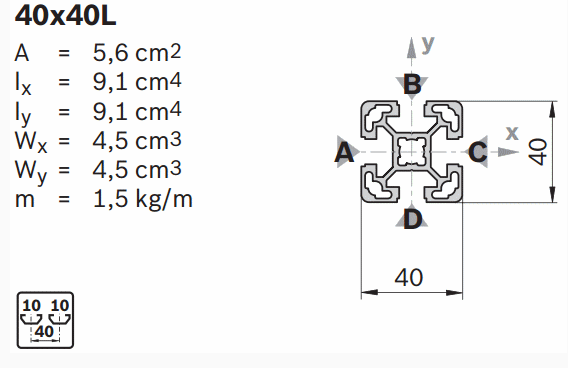

In [57]:

Image(filename="D:\TESIS viajera\Viajera\Contorno y propiedades geometricas\Perfil 4040.png") 

In [20]:
delta_4040=1/2*F*L**3/(9.1*E_aluminio)
display(Latex(f'numero $\delta= {delta_4040:.2f} cm$'))

<IPython.core.display.Latex object>